# Download Dataset

Import Libraries 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import seaborn as sns
from pandas_profiling import ProfileReport


Download Secom.data and Put it in dataframe(df1)

In [24]:
url1 ='https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data'
names = ["feature" + str(x) for x in range(1, 591)]
df1 = pd.read_csv(url1,sep=" ", names=names, na_values = "NaN",header=None)
df1.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


Download Secom Label.data and Put it in dataframe(df2) and rename the columns

In [25]:
url2 ='https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data'
df2 = pd.read_csv(url2,sep=" ",names = ["Result","Date"])

#df2.columns =['Pass/Fail','Date']
df2.head()

,Result,Date
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


Joining both the datasets 

In [26]:

Secom = pd.merge(df1, df2,left_index=True,right_index=True)
print(Secom)

      feature1  feature2   feature3   feature4  feature5  feature6  feature7  \
0      3030.93   2564.00  2187.7333  1411.1265    1.3602     100.0   97.6133   
1      3095.78   2465.14  2230.4222  1463.6606    0.8294     100.0  102.3433   
2      2932.61   2559.94  2186.4111  1698.0172    1.5102     100.0   95.4878   
3      2988.72   2479.90  2199.0333   909.7926    1.3204     100.0  104.2367   
4      3032.24   2502.87  2233.3667  1326.5200    1.5334     100.0  100.3967   
...        ...       ...        ...        ...       ...       ...       ...   
1562   2899.41   2464.36  2179.7333  3085.3781    1.4843     100.0   82.2467   
1563   3052.31   2522.55  2198.5667  1124.6595    0.8763     100.0   98.4689   
1564   2978.81   2379.78  2206.3000  1110.4967    0.8236     100.0   99.4122   
1565   2894.92   2532.01  2177.0333  1183.7287    1.5726     100.0   98.7978   
1566   2944.92   2450.76  2195.4444  2914.1792    1.5978     100.0   85.1011   

      feature8  feature9  feature10  ..

In [27]:
Secom.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,Result,Date
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00


We can assume there are 590 independent processes that together add up to create a semiconductor and at the end of the process they are tagged as success or failure in terms of creating 1 new functional semiconductor unit.
There are quite a few NaN entries and entries which are equal to the value 0.
The 0s are not sparse you can see quite a few of them in continuation which may indicate an error or lack of signal i/o.



In [28]:
Secom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, feature1 to Date
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


**Formatting Date column**

In [29]:
Secom.loc[:, 'Date'] = pd.to_datetime(Secom.loc[:, 'Date'])
Secom.set_index('Date', inplace = True) # set index on dataset
print(Secom.head()) 
print(Secom.tail()) 

                     feature1  feature2   feature3   feature4  feature5  \
Date                                                                      
2008-07-19 11:55:00   3030.93   2564.00  2187.7333  1411.1265    1.3602   
2008-07-19 12:32:00   3095.78   2465.14  2230.4222  1463.6606    0.8294   
2008-07-19 13:17:00   2932.61   2559.94  2186.4111  1698.0172    1.5102   
2008-07-19 14:43:00   2988.72   2479.90  2199.0333   909.7926    1.3204   
2008-07-19 15:22:00   3032.24   2502.87  2233.3667  1326.5200    1.5334   

                     feature6  feature7  feature8  feature9  feature10  ...  \
Date                                                                    ...   
2008-07-19 11:55:00     100.0   97.6133    0.1242    1.5005     0.0162  ...   
2008-07-19 12:32:00     100.0  102.3433    0.1247    1.4966    -0.0005  ...   
2008-07-19 13:17:00     100.0   95.4878    0.1241    1.4436     0.0041  ...   
2008-07-19 14:43:00     100.0  104.2367    0.1217    1.4882    -0.0124  ...   


In [45]:
Secom['Date'] = pd.to_datetime(Secom['Date'])......change code

KeyError: 'Date'

**Get the exact number of manufacturing Pass and failures**

In [30]:
Counter(Secom['Result'])

Counter({-1: 1463, 1: 104})

104 values belong to the fail Category and 1463 to Pass. Large Class imbalance can be seen.

# Exploratory Data Analysis Before Cleaning the Data

**summary statistics for the entire dataset**

In [31]:
Secom.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,Result
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


**Plotting a histogram of the pass and fail cases**

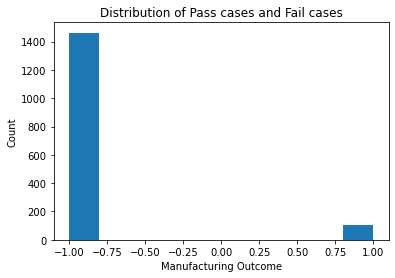

In [32]:

plt.hist(Secom['Result'])
plt.title('Distribution of Pass cases and Fail cases')
plt.ylabel('Count')
plt.xlabel('Manufacturing Outcome')
plt.show()


Text(0.5, 1.0, 'Time series of Result')

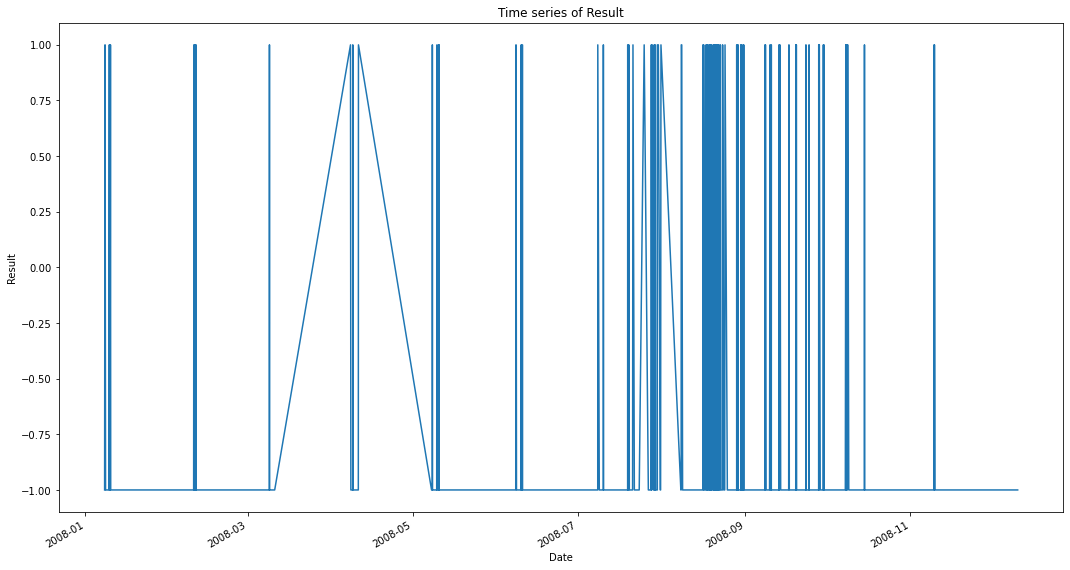

In [33]:
# plot the manufacturing outcome as a time series
ax = plt.figure(figsize=(18, 10)).gca() # define plot
Secom.Result.plot(ax = ax) # plot result
ax.set_xlabel('Date')
ax.set_ylabel('Result')
ax.set_title('Time series of Result')

KeyError: 'Date'

In [ ]:
Univariate analysis

**plot a histogram of the distributions of a few features**

############################

plt.hist(Secom.feature1)
plt.title('Distribution of Feature1')
plt.ylabel('Count')
plt.xlabel('Feature1')
plt.show()

################################
plt.hist(Secom.feature590)
plt.title('Distribution of Feature590')
plt.ylabel('Count')
plt.xlabel('Feature590')
plt.show()

##############################
distribution of feature6
plt.hist(Secom.feature6)
plt.title('Distribution of Feature6')
plt.ylabel('Count')
plt.xlabel('Feature6')
plt.show()

**Volatility(Tobe discussed)**

In [ ]:
return_data = df1.pct_change()#Percentchange from prior value
volatility = return_data.std()#standard deviation
type_volatility=volatility.to_dict()#to display all features volatility
type_volatility
# type_volatility

**Skewness**

In [ ]:
from scipy.stats import skew
dataFrame = pd.DataFrame(data=Secom,);
skewValue = dataFrame.skew(axis=0)
skew_dict = skewValue.to_dict()
skew_dict

**Shapiro**

In [ ]:
def get_shapiro_for_col(df, col_name):
  return shapiro(df[df[col_name].notnull()][col_name])

In [ ]:
shapiro_test_value_dict = dict()
shapiro_p_value_dict = dict()
for col in Secom.columns:
  test_value, p_value = get_shapiro_for_col(Secom, col)
  print(col, test_value, p_value)
  shapiro_test_value_dict[col] = test_value
  shapiro_p_value_dict[col] = p_value

In [ ]:
df_list = [Secom.describe(),
pd.DataFrame(outlier_dict, index=['outlier_count']),
pd.DataFrame(null_dict, index=['null_count']),
pd.DataFrame(skew_dict, index=['skew']),
pd.DataFrame(type_dict, index=['dtype']),
pd.DataFrame(shapiro_test_value_dict, index=['shapiro_test_value']),
pd.DataFrame(shapiro_p_value_dict, index=['shapiro_p_value']),
]
detailed_describe = pd.concat(df_list)
detailed_describe

In [ ]:
#Data Visualization

# distribution plot to see first four column's distribution
plt.rcParams['figure.figsize'] = (18, 16)
plt.subplot(2, 2, 1)
sns.distplot(Secom['feature1'], color = 'darkblue')
plt.title('First Sensor Measurements', fontsize = 20)
plt.subplot(2, 2, 2)
sns.distplot(Secom['feature6'], color = 'red')
plt.title('Second Sensor Measurements', fontsize = 20)
plt.subplot(2, 2, 3)
sns.distplot(Secom['feature590'], color = 'darkgreen')
plt.title('Third Sensor Measurements', fontsize = 20)
plt.subplot(2, 2, 4)
sns.distplot(Secom['feature500'], color = 'yellow')
plt.title('Fourth Sensor Measurements', fontsize = 20)
plt.show()


In [25]:
need to check..# establish target and features of the manufacturing data
# set the target to the encoded manufacturing outcome column
target = Secom[['Result']]
# set the features as the rest of the dataset after dropping the features that are no
Data = Secom.drop(['Result'], axis=1)

In [26]:
from sklearn import model_selection

# split original data into training and test sets
Data_train, Data_test , target_train, target_test = model_selection.train_test_split(Data, target, 
                                                    test_size=0.2, random_state=6)


OR

In [47]:
# split original data into training and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(Secom, test_size=0.3)



,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,Result
Date,,,,,,,,,,,,,,,,,,,,,
2008-07-27 04:18:00,3010.41,2632.80,2203.9000,1116.4129,1.2639,100.0,102.2733,0.1199,1.4227,0.0194,...,125.0600,0.5032,0.0159,0.0039,3.1576,0.0288,0.0361,0.0101,125.0600,-1
2008-09-30 23:58:00,3025.09,2548.76,2209.9555,2325.1727,2.1685,100.0,85.7689,0.1222,1.4573,0.0294,...,40.8765,0.5035,0.0180,0.0045,3.5654,0.0379,0.0155,0.0056,40.8765,-1
2008-09-23 22:25:00,2935.34,2551.27,2276.4556,2148.5397,1.2317,100.0,93.6778,0.1199,1.4132,-0.0310,...,NaN,0.4941,0.0178,0.0043,3.6018,0.0257,0.0174,0.0060,67.6124,-1
2008-08-16 07:33:00,3043.05,2466.36,2205.2889,1630.3112,1.2733,100.0,98.8056,0.1218,1.4538,0.0161,...,0.0000,0.5025,0.0121,0.0038,2.4041,0.0015,0.0207,0.0073,0.0000,-1
2008-08-31 04:46:00,3040.10,2369.95,2201.8222,1288.0857,1.6769,100.0,95.9789,0.1209,1.4542,-0.0002,...,NaN,0.5003,0.0101,0.0026,2.0141,0.0225,0.0193,0.0057,85.7175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-08-29 14:30:00,NaN,2651.37,2180.7000,1159.3838,1.0177,100.0,98.9367,0.1222,1.5301,-0.0063,...,NaN,0.5058,0.0104,0.0029,2.0538,-0.0012,0.0252,0.0081,0.0000,-1
2008-08-28 17:27:00,2996.95,2446.92,2163.5889,1448.3869,1.7014,100.0,104.8333,0.1256,1.5713,-0.0125,...,NaN,0.4990,0.0095,0.0031,1.8989,0.0316,0.0098,0.0036,31.0788,-1
2008-11-10 15:33:00,3051.10,2509.14,2195.1000,1526.4440,0.8279,100.0,96.3100,0.1203,1.4718,0.0100,...,358.7989,0.4966,0.0200,0.0051,4.0281,0.0195,0.0701,0.0208,358.7989,-1


In [48]:
test


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,Result
Date,,,,,,,,,,,,,,,,,,,,,
2008-07-27 04:18:00,3010.41,2632.80,2203.9000,1116.4129,1.2639,100.0,102.2733,0.1199,1.4227,0.0194,...,125.0600,0.5032,0.0159,0.0039,3.1576,0.0288,0.0361,0.0101,125.0600,-1
2008-09-30 23:58:00,3025.09,2548.76,2209.9555,2325.1727,2.1685,100.0,85.7689,0.1222,1.4573,0.0294,...,40.8765,0.5035,0.0180,0.0045,3.5654,0.0379,0.0155,0.0056,40.8765,-1
2008-09-23 22:25:00,2935.34,2551.27,2276.4556,2148.5397,1.2317,100.0,93.6778,0.1199,1.4132,-0.0310,...,NaN,0.4941,0.0178,0.0043,3.6018,0.0257,0.0174,0.0060,67.6124,-1
2008-08-16 07:33:00,3043.05,2466.36,2205.2889,1630.3112,1.2733,100.0,98.8056,0.1218,1.4538,0.0161,...,0.0000,0.5025,0.0121,0.0038,2.4041,0.0015,0.0207,0.0073,0.0000,-1
2008-08-31 04:46:00,3040.10,2369.95,2201.8222,1288.0857,1.6769,100.0,95.9789,0.1209,1.4542,-0.0002,...,NaN,0.5003,0.0101,0.0026,2.0141,0.0225,0.0193,0.0057,85.7175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-08-29 14:30:00,NaN,2651.37,2180.7000,1159.3838,1.0177,100.0,98.9367,0.1222,1.5301,-0.0063,...,NaN,0.5058,0.0104,0.0029,2.0538,-0.0012,0.0252,0.0081,0.0000,-1
2008-08-28 17:27:00,2996.95,2446.92,2163.5889,1448.3869,1.7014,100.0,104.8333,0.1256,1.5713,-0.0125,...,NaN,0.4990,0.0095,0.0031,1.8989,0.0316,0.0098,0.0036,31.0788,-1
2008-11-10 15:33:00,3051.10,2509.14,2195.1000,1526.4440,0.8279,100.0,96.3100,0.1203,1.4718,0.0100,...,358.7989,0.4966,0.0200,0.0051,4.0281,0.0195,0.0701,0.0208,358.7989,-1


In [49]:
train

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,Result
Date,,,,,,,,,,,,,,,,,,,,,
2008-07-27 04:18:00,3010.41,2632.80,2203.9000,1116.4129,1.2639,100.0,102.2733,0.1199,1.4227,0.0194,...,125.0600,0.5032,0.0159,0.0039,3.1576,0.0288,0.0361,0.0101,125.0600,-1
2008-09-30 23:58:00,3025.09,2548.76,2209.9555,2325.1727,2.1685,100.0,85.7689,0.1222,1.4573,0.0294,...,40.8765,0.5035,0.0180,0.0045,3.5654,0.0379,0.0155,0.0056,40.8765,-1
2008-09-23 22:25:00,2935.34,2551.27,2276.4556,2148.5397,1.2317,100.0,93.6778,0.1199,1.4132,-0.0310,...,NaN,0.4941,0.0178,0.0043,3.6018,0.0257,0.0174,0.0060,67.6124,-1
2008-08-16 07:33:00,3043.05,2466.36,2205.2889,1630.3112,1.2733,100.0,98.8056,0.1218,1.4538,0.0161,...,0.0000,0.5025,0.0121,0.0038,2.4041,0.0015,0.0207,0.0073,0.0000,-1
2008-08-31 04:46:00,3040.10,2369.95,2201.8222,1288.0857,1.6769,100.0,95.9789,0.1209,1.4542,-0.0002,...,NaN,0.5003,0.0101,0.0026,2.0141,0.0225,0.0193,0.0057,85.7175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-08-29 14:30:00,NaN,2651.37,2180.7000,1159.3838,1.0177,100.0,98.9367,0.1222,1.5301,-0.0063,...,NaN,0.5058,0.0104,0.0029,2.0538,-0.0012,0.0252,0.0081,0.0000,-1
2008-08-28 17:27:00,2996.95,2446.92,2163.5889,1448.3869,1.7014,100.0,104.8333,0.1256,1.5713,-0.0125,...,NaN,0.4990,0.0095,0.0031,1.8989,0.0316,0.0098,0.0036,31.0788,-1
2008-11-10 15:33:00,3051.10,2509.14,2195.1000,1526.4440,0.8279,100.0,96.3100,0.1203,1.4718,0.0100,...,358.7989,0.4966,0.0200,0.0051,4.0281,0.0195,0.0701,0.0208,358.7989,-1


**Missing values Analysis**

In [27]:
empty_cols=Data.columns[Data.isna().mean()>=.25]#Threshold 
Secom.sum() * 100 / len(Secom)
empty_cols.shape

(32,)

In [ ]:
histogram

We can see that 32 columns have more than a quarter of the data missing, so we can decide to drop them after further analysis.

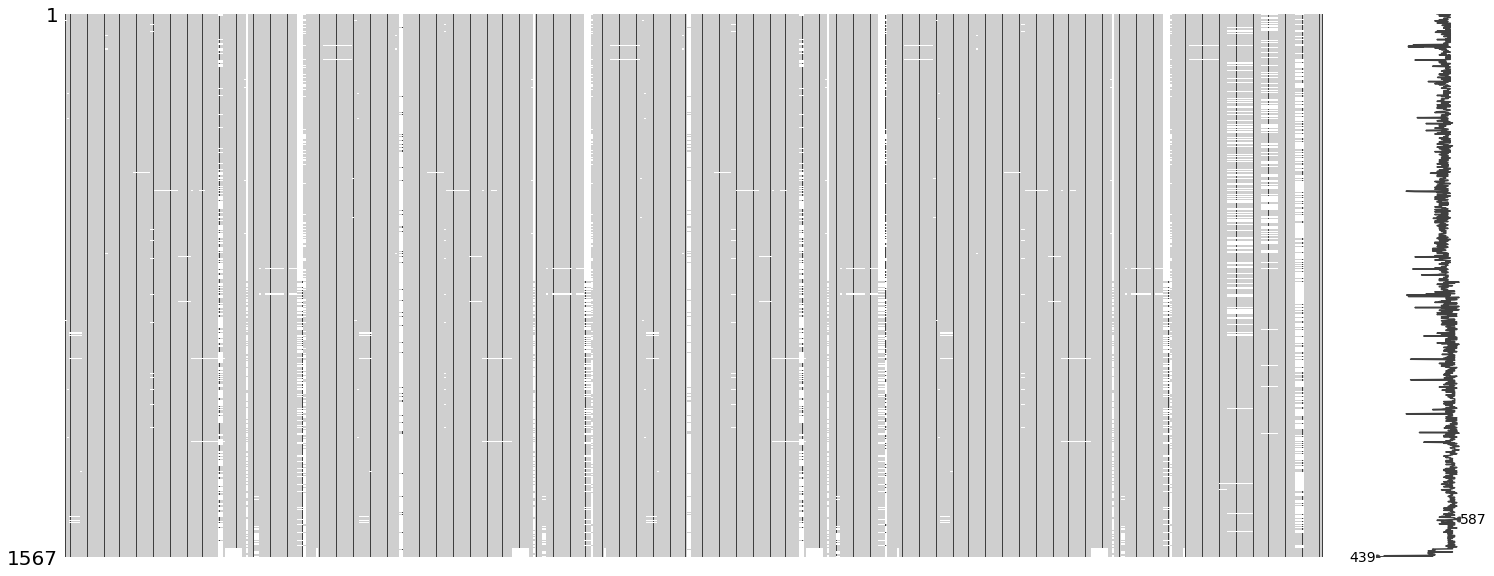

In [37]:
import missingno as msno
msno.matrix(Secom);


In [ ]:
msno.bar(Secom)

In [15]:
Secom.isnull().sum().sum()

41951

As we can see the number of missing values are quite large and sometimes more than half the values of the columns are entirely missing, we can consider dropping them altogether as the inconsistensies in between the rows of processes will not help in predicting the target variable.
Some of the columns are entirely filled with the value of 0 which we should eliminate as well.
Some features even exhibit negative values and many may have outliers on the higher side as we can see from the gap between max and 75%

array([[<AxesSubplot:title={'center':'percent_missing'}>]], dtype=object)

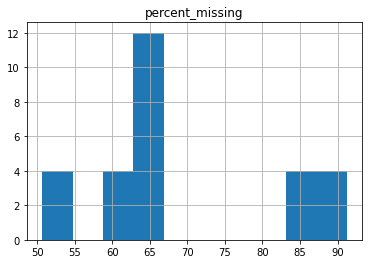

In [50]:
#Percentage OPTION2
percent_missing = (Secom.isnull().sum() * 100 / len(Secom)).round(4).sort_values(ascending=False)
percent_missing
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

above_fifty_df = missing_value_df[missing_value_df['percent_missing']>50]
above_fifty_df

#df hist
above_fifty_df.hist(bins=10)

In [ ]:
# num of missing entries per column

 

m = [sum(secom[x].isnull()) for x in range(secom.shape[1])]

 

# distribution of columns with missing entries
plt.hist(m, color='blue')
plt.title("Distribution of missing values")
plt.xlabel("No. of missing values in a column")
plt.ylabel("Columns")
plt.show()

**Unique Value Analysis**

In [17]:
nunique = Secom.apply(pd.Series.nunique)
nunique

feature1      1520
feature2      1504
feature3       507
feature4       518
feature5       503
              ... 
feature587     322
feature588     260
feature589     120
feature590     611
Result           2
Length: 591, dtype: int64

In [18]:
const_cols = nunique[nunique == 1].index
const_cols.shape

(116,)

As we can see of the 591 features 116 of them only have 1 unique value which indicates a faulty signal across all batches and therefore we can decide to drop these later.

**Duplicate Analysis**

In [ ]:
Secom['Date'].nunique()

**Bivariate Analysis**

**Correlation Analysis**

In [39]:
# Create correlation matrix
corr_matrix = Secom.corr()

In [41]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop1 = [column for column in upper.columns if any(upper[column] < -0.9)]
to_drop2 = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop1)
print(to_drop2)


['feature8', 'feature37', 'feature97', 'feature105', 'feature106', 'feature107', 'feature141', 'feature245', 'feature247', 'feature276', 'feature383', 'feature384', 'feature385', 'feature517', 'feature518', 'feature519']
['feature28', 'feature51', 'feature55', 'feature61', 'feature71', 'feature102', 'feature124', 'feature128', 'feature141', 'feature149', 'feature153', 'feature155', 'feature158', 'feature165', 'feature166', 'feature175', 'feature200', 'feature205', 'feature207', 'feature208', 'feature210', 'feature226', 'feature246', 'feature247', 'feature250', 'feature253', 'feature271', 'feature272', 'feature273', 'feature274', 'feature275', 'feature276', 'feature278', 'feature279', 'feature280', 'feature281', 'feature282', 'feature283', 'feature284', 'feature286', 'feature287', 'feature288', 'feature289', 'feature290', 'feature291', 'feature292', 'feature293', 'feature294', 'feature295', 'feature296', 'feature297', 'feature298', 'feature299', 'feature300', 'feature301', 'feature302',

<AxesSubplot:>

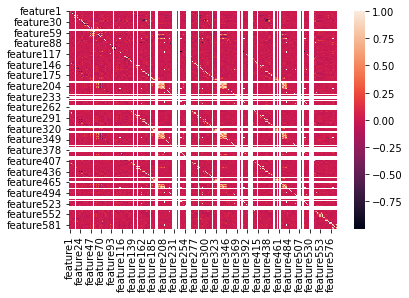

In [51]:
##########sns.heatmap(df1.corr())

In [ ]:
plt.rcParams['figure.figsize'] = (20, 20)
sns.heatmap(Secom.corr(), cmap = 'GnBu_r')
plt.title('Heatmap for the Data', fontsize = 20)

**Outlier Analysis**

In [54]:
from scipy import stats

def outliers_high(Secom):
    q1= Secom.quantile(.25)
    q2= Secom.quantile(.5)
    q3= Secom.quantile(.75)
    Secom = np.where(Secom > q3+ stats.iqr(Secom),q2,Secom)
    return Secom

def outliers_low(feat):
    q1= Secom.quantile(.25)
    q2= Secom.quantile(.5)
    q3= Secom.quantile(.75)
    Secom = np.where(Secom < q1 - stats.iqr(Secom),q2,Secom)
    return Secom

feature1         AxesSubplot(0.125,0.87475;0.133621x0.00525035)
feature2      AxesSubplot(0.285345,0.87475;0.133621x0.00525035)
feature3       AxesSubplot(0.44569,0.87475;0.133621x0.00525035)
feature4      AxesSubplot(0.606034,0.87475;0.133621x0.00525035)
feature5      AxesSubplot(0.766379,0.87475;0.133621x0.00525035)
                                    ...                        
feature587    AxesSubplot(0.285345,0.137601;0.133621x0.00525...
feature588    AxesSubplot(0.44569,0.137601;0.133621x0.00525035)
feature589    AxesSubplot(0.606034,0.137601;0.133621x0.00525...
feature590    AxesSubplot(0.766379,0.137601;0.133621x0.00525...
Result            AxesSubplot(0.125,0.1313;0.133621x0.00525035)
Length: 591, dtype: object

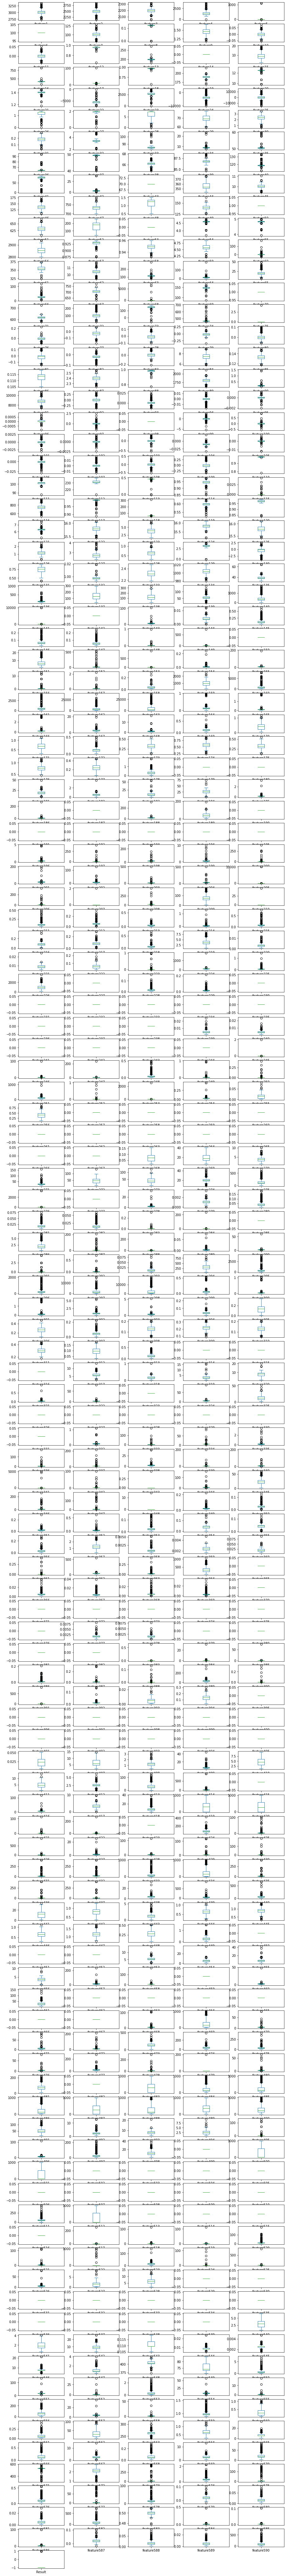

In [56]:
Secom.plot(kind='box', subplots=True,layout=(120,5), fontsize=10, figsize=(15,150))

 **we can observe almost all the features have outliers present in them which is not a good indication**

In [53]:
z_values = print(stats.zscore(Secom['feature2']))

Date
2008-07-19 11:55:00   NaN
2008-07-19 12:32:00   NaN
2008-07-19 13:17:00   NaN
2008-07-19 14:43:00   NaN
2008-07-19 15:22:00   NaN
                       ..
2008-10-16 15:13:00   NaN
2008-10-16 20:49:00   NaN
2008-10-17 05:26:00   NaN
2008-10-17 06:01:00   NaN
2008-10-17 06:07:00   NaN
Name: feature2, Length: 1567, dtype: float64


In [ ]:
def get_outlier(df, col_name, limit_factor=3):
  upper_limit = df[col_name].mean()+ limit_factor*df[col_name].std()
  lower_limit = df[col_name].mean()- limit_factor*df[col_name].std()
  return len(df[(df[col_name]<lower_limit)|(df[col_name]>upper_limit)])

In [ ]:
outlier_dict = dict()
for col in Secom.columns:
  count = get_outlier(Secom, col, limit_factor=3)
  print(col, count)
  #outlier_dict[col] = count